<a href="https://colab.research.google.com/github/vortexash/Tensorflow-Developer/blob/main/04_transfer_learning_in_tensorflow_part_1_feature_extraction_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with Tensorflow Part 1: Feature Extraction

Transfer learning is leveraging a working model's existing architecture and learned patterns for our own problem.

There are two main benifits:
1. Can leverage neural network architecture proven to work on problems similar to our own.
2. Can leverage working neural network architecture which has already learned patterns on similar data to our own, then we can adapt those patterns to ourr own data.

In [1]:
# Are we using a GPU?
!nvidia-smi

Sun Oct  3 13:15:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Downloading and becoming one with the data

In [2]:
# Get data(10% of 10 data food classes from Food101)
import zipfile

# Download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2021-10-03 13:19:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 108.177.120.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   165MB/s    in 1.0s    

2021-10-03 13:19:32 (165 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} image in '{dirpath}'.")

There are 2 directories and 0 image in '10_food_classes_10_percent'.
There are 10 directories and 0 image in '10_food_classes_10_percent/train'.
There are 0 directories and 75 image in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 image in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 image in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 image in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 image in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 image in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 image in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 image in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 image in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 image in '10_food_classes_10_percent/train/pizza

## Creating data loaders (preparing the data)

we'll use the **`ImageDataGenerator`** class to load in our images in batches

In [4]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir ="10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale =1/255.)
test_datagen = ImageDataGenerator(rescale =1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size =IMAGE_SHAPE,
                                                          batch_size = BATCH_SIZE,
                                                          class_mode = "categorical")

print("Testing images:")
test_data_10_percent = test_datagen.flow_from_directory(test_dir,
                                                          target_size =IMAGE_SHAPE,
                                                          batch_size = BATCH_SIZE,
                                                          class_mode = "categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


## Setting up callbacks (things to run while our model trains)

Callbacks are extra functionality you can add to our models to be performed during or after training. Some of the mmost popular callbacks:

* Tracking experiments with the TensorBoard callback
* Model checkpoint with the ModelCheckpoint callback
* Stopping a model from training (before it trains too long and overfits) with Earlystopping 

In [5]:
# Create TensorBoard callback (functionized  because we need to create a new one for each model)
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

**Note:** We can customize the directory where our TensorBoard logs (model training metrics) get saved to wherever we like. The **`log_dir`** parameter we've created above is only one option.

## Creating models using TensorFlow Hub

In  the past we have use tensorflow to create our own models layer by layer from scratch.

Now we're going to do a similar process, except the majority of our model's layers are going to come from Tensorflow Hub.

We can access pre-trained model on https://tfhub.dev/

Browsing the Tensorflow Hub page and sorting for image classification, we found the following feature vector model link: https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1






In [6]:
# Let's compare the following two models

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [10]:
# Import dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [13]:
# Let's make a create_model() function to create a model from a URL
def create_model(model_url, num_classes=10):
  """
  Takes a Tensorflow Hub URL and creates a Keras Sequential model with it.

  Args: 
    model_url (str): A tensorflow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
    should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url ad feature extractor
    layer and Dense output layer with num_classes output neurons.
  """
  # Download the pretrained model and save it as a keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,# freeze the already learned patterns
                                           name="feature_extraction_layer",
                                           input_shape=IMAGE_SHAPE+(3,)) 
  # Create our own model
  model = tf.keras.Sequential([
                              feature_extractor_layer,
                              layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

### Creating and Testing ResNet TensorFlow Hub Feature Extraction model

In [14]:
# Create Resnet model
resnet_model = create_model(resnet_url,
                            num_classes=train_data_10_percent.num_classes)

In [15]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              23564800  
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [16]:
# Compile our resent model
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"]) 

In [21]:
# Fit the model
resnet_history = resnet_model.fit(train_data_10_percent,
                 epochs=5, 
                 steps_per_epoch =len(train_data_10_percent),
                 validation_data = test_data_10_percent,
                 validation_steps=len(test_data_10_percent),
                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                        experiment_name="resnet50V2")])

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20211003-144612
Epoch 1/5
24/24 [==============================] - 59s 1s/step - loss: 2.0740 - accuracy: 0.3173 - val_loss: 1.2935 - val_accuracy: 0.5808
Epoch 2/5
24/24 [==============================] - 20s 877ms/step - loss: 0.9676 - accuracy: 0.7027 - val_loss: 0.9350 - val_accuracy: 0.6848
Epoch 3/5
24/24 [==============================] - 20s 878ms/step - loss: 0.6636 - accuracy: 0.8120 - val_loss: 0.7739 - val_accuracy: 0.7520
Epoch 4/5
24/24 [==============================] - 21s 878ms/step - loss: 0.4957 - accuracy: 0.8627 - val_loss: 0.7363 - val_accuracy: 0.7676
Epoch 5/5
24/24 [==============================] - 21s 885ms/step - loss: 0.3926 - accuracy: 0.9120 - val_loss: 0.6909 - val_accuracy: 0.7816


That.Is.Incredible Our transfer learning feature extractor model out performed All of the previous model we build by hand...(substantially)
and in a quicker training time AND with only 10% of the training examples.

In [28]:
# Let's create a function to plot our loss curves..
# Tidbit: we could put a function like this into a script called "helper.py" and import when we need it.
import matplotlib.pyplot as plt

# Plot the validation and teraining curves
def plot_loss_curves(history):
  """
  Returns seperate  loss curves for training and validation metrics.

  Args:
    history" Tensorflow History object.

  Return:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


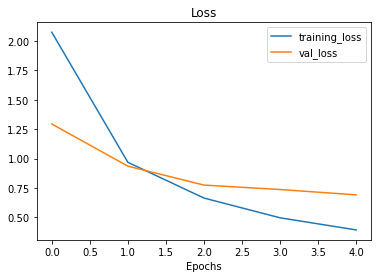

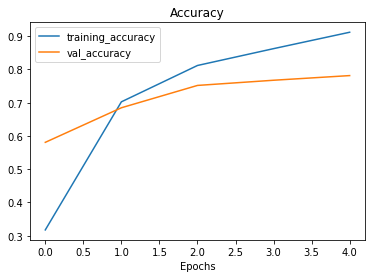

In [29]:
plot_loss_curves(resnet_history)

### Creating and Testing EfficientNetB0 TensorFlow Hub Feature Extraction model

In [30]:
# Create EfficientNetB0 feature extractor
efficientnet_model = create_model(efficientnet_url,
                            num_classes=train_data_10_percent.num_classes)

In [31]:
#Summary of EfficientNetB0
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [32]:
# Compile our resent model
efficientnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"]) 

In [33]:
# Fit the model
efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                 epochs=5,
                 steps_per_epoch =len(train_data_10_percent),
                 validation_data = test_data_10_percent,
                 validation_steps=len(test_data_10_percent),
                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                        experiment_name="EfficientNetB0)")])

Saving TensorBoard log files to: tensorflow_hub/EfficientNetB0)/20211003-151002
Epoch 1/5
24/24 [==============================] - 34s 991ms/step - loss: 1.8648 - accuracy: 0.4387 - val_loss: 1.3069 - val_accuracy: 0.7228
Epoch 2/5
24/24 [==============================] - 19s 801ms/step - loss: 1.0762 - accuracy: 0.7653 - val_loss: 0.8744 - val_accuracy: 0.8116
Epoch 3/5
24/24 [==============================] - 19s 799ms/step - loss: 0.7709 - accuracy: 0.8347 - val_loss: 0.7031 - val_accuracy: 0.8460
Epoch 4/5
24/24 [==============================] - 19s 801ms/step - loss: 0.6200 - accuracy: 0.8600 - val_loss: 0.6144 - val_accuracy: 0.8516
Epoch 5/5
24/24 [==============================] - 19s 799ms/step - loss: 0.5207 - accuracy: 0.8827 - val_loss: 0.5601 - val_accuracy: 0.8576


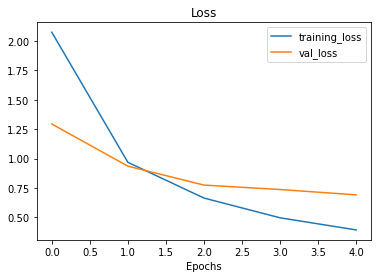

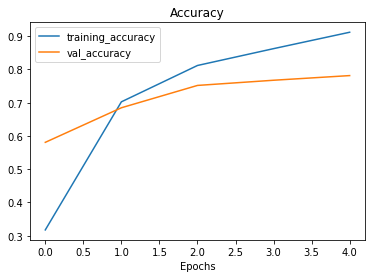

In [34]:
plot_loss_curves(resnet_history)

In [37]:
# How many layers does our efficientnetb0 feature extractor have?
len(efficientnet_model.layers[0].weights)

309

## Differerent types of transfer learning

* **"As is"** transfer learning - using an existing model with no change what so ever(e.g using ImageNet model on 1000 ImageNet classes, none of our own).
* **"Feature extraction"** transfer learning - use the prelearned patterns of an existing model(e.g EfficientNetB0 trained on Image Net) and adjust the output layer for your own problem(e.g. 100 classes -> 10 classes of food)
* **"Fine-tuning"**  transfer learning - use the prelearned patterns of an existing model and "fine-tune" many or all of the underlying layers(including new output layers)

## Comparing our model using TensorBoard

**Note:** When we upload things to TensorBoard .dev, our experiments are public . So if we're running private experiments (things we don't want other to see) do not upload them to TensorBoard.dev

In [39]:
# Upload Tensorboard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
 --name "EfficientNetB0 vs. ResNet50V2" \
 --description "Comparing two different TF Hub feature extraction model architecture using 10% of the training data" \
 --one_shot

2021-10-03 15:45:59.070171: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-03 15:45:59.096501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-03 15:45:59.096999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privac

Our TensorBoard experiments are uploaded publically https://tensorboard.dev/experiment/QsAdB4ahRu62VK4FqSV16g/

In [40]:
# Check out what TensorBoard experiments we have
!tensorboard dev list

2021-10-03 15:50:49.176827: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-03 15:50:49.186433: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-03 15:50:49.186925: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
https://tensorboard.dev/experiment/QsAdB4ahRu62VK4FqSV16g/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction model architecture using 10% of the training data
	Id                   QsAdB4ahRu62VK4FqSV16g
	Created              2021-10-03 15:46:35 (4 minutes ago)
	Upd

In [ ]:
# Delete an experiment
#!tensorboard dev delete --experiment_id QsAdB4ahRu62VK4FqSV16g

In [41]:
# Confirm the deletion by re-checking what experiments we have left
!tensorboard dev list

2021-10-03 15:53:22.007181: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-03 15:53:22.015370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-03 15:53:22.015827: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
https://tensorboard.dev/experiment/QsAdB4ahRu62VK4FqSV16g/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction model architecture using 10% of the training data
	Id                   QsAdB4ahRu62VK4FqSV16g
	Created              2021-10-03 15:46:35 (6 minutes ago)
	Upd